In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
import utilcompute as uc
import sklearn.linear_model as lm
from scipy.stats import pearsonr
from sklearn.metrics import r2_score


In [2]:
x = np.linspace(1, 10, 10)
signal = 10 - x
print(signal)
signal[-1] = 100
print(signal)
noise = np.random.normal(0, 0.1, signal.shape)
y = signal + noise


[ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
[   9.    8.    7.    6.    5.    4.    3.    2.    1.  100.]


In [3]:
df = pd.DataFrame(data = {'x': x, 'y': y} )
features = 'x'
target= 'y'


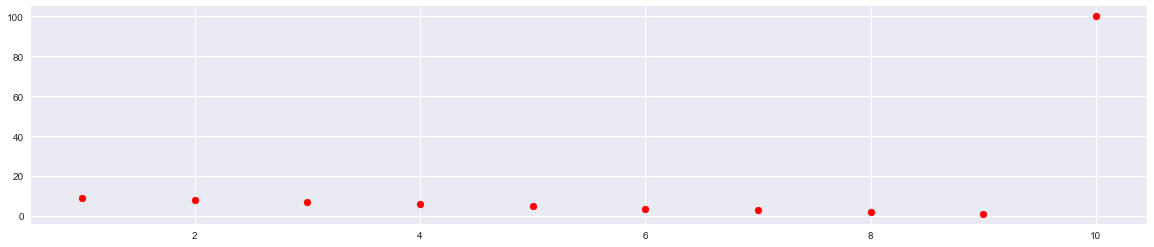

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 4))
ax.scatter(df['x'], df['y'], color='red')
plt.show()

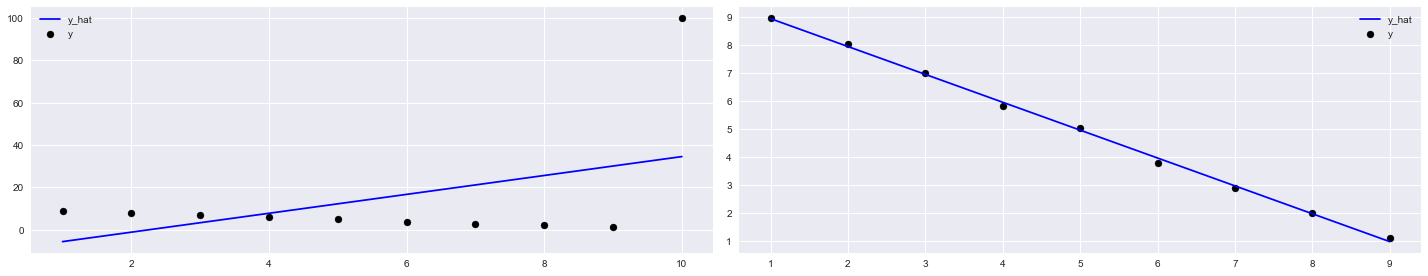

r  : pearson coefficient of correlation :                0.4478    r  :                                                 -0.9993
r2 : coefficient of determination       :                0.2005    r2 :                                                  0.9986
R2 : coefficient of determination       :             -100.0448    R2 :                                                  -2.976


In [5]:
model = lm.LinearRegression()
model.fit(df[features].values.reshape(-1, 1), df[target])
y_pred = model.predict(df[features].values.reshape(-1, 1))

regression_line = (model.intercept_ + model.coef_ * df[features])
r_a = round( pearsonr(x = df['x'], y = df[target])[0], 4 )
r2_a = round( r_a**2, 4 )
R2_a = round( r2_score(df['x'], df[target]), 4)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 4), sharey = False)


axs[0].scatter(df[features], df[target],  color='black', label = 'y')
#axs[0].plot(df[features], y_pred, color='blue', label = 'y_hat')
axs[0].plot(df[features], regression_line, color='blue', label = 'y_hat')
axs[0].legend(loc = 'best')

df.drop(df.index[len(df)-1], inplace = True)
model = lm.LinearRegression()
model.fit(df[features].values.reshape(-1, 1), df[target])
y_pred = model.predict(df[features].values.reshape(-1, 1))
regression_line = (model.intercept_ + model.coef_ * df[features])

axs[1].scatter(df['x'], df[target],  color='black', label = 'y')
#axs[1].plot(df['x'], y_pred, color='blue', label = 'y_hat')
axs[1].plot(df['x'], regression_line, color='blue', label = 'y_hat')
axs[1].legend(loc = 'best')


plt.tight_layout()
plt.show()


r_b = round( pearsonr(x = df['x'], y = df[target])[0], 4 )
r2_b = round( r_b**2, 4 )
R2_b = round( r2_score(df['x'], df[target]), 4 )

print('r  : pearson coefficient of correlation : {:>21}    r  : {:>55}'.format(r_a, r_b))
print('r2 : coefficient of determination       : {:>21}    r2 : {:>55}'.format(r2_a, r2_b))
print('R2 : coefficient of determination       : {:>21}    R2 : {:>55}'.format(R2_a, R2_b))